# Part I - (Loans)
## by (Ivan Gonzalez Gutierrez)

## Introduction
The dataset we are analyzing is the prosper loan one. Based on the existing data, we have decided to draw conclusions helping us to answer questions such as:

What can make one get a good loan?

What can make one get his loan application approved?

Our conclusions will be made whith this data set that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others., which is substential and help us to be confident about what we will be saying. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the loans data
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Drop all variables that we are not going to use
lista = ['LoanOriginationDate',
'LoanOriginationQuarter',
'MemberKey',
'MonthlyLoanPayment',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_InterestandFees',
'LP_ServiceFees',
'LP_CollectionFees',
'LP_GrossPrincipalLoss',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments',
'PercentFunded',
'Recommendations',
'InvestmentFromFriendsCount',
'InvestmentFromFriendsAmount',
'Investors',
'LoanKey',
'TotalProsperLoans',
'TotalProsperPaymentsBilled',
'OnTimeProsperPayments',
'ProsperPaymentsLessThanOneMonthLate',
'ProsperPaymentsOneMonthPlusLate',
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding',
'ScorexChangeAtTimeOfListing',
'LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination',
'LoanNumber',
'CurrentlyInGroup',
'GroupKey',
'DateCreditPulled',
'CreditScoreRangeLower',
'CreditScoreRangeUpper',
'FirstRecordedCreditLine',
'CurrentCreditLines',
'OpenCreditLines',
'TotalCreditLinespast7years',
'OpenRevolvingAccounts',
'OpenRevolvingMonthlyPayment',
'InquiriesLast6Months',
'TotalInquiries',
'CurrentDelinquencies',
'AmountDelinquent',
'DelinquenciesLast7Years',
'PublicRecordsLast10Years',
'PublicRecordsLast12Months',
'RevolvingCreditBalance',
'BankcardUtilization',
'AvailableBankcardCredit',
'TotalTrades',
'TradesOpenedLast6Months',
'DebtToIncomeRatio',
'BorrowerState',
'Occupation','ListingCreationDate','ListingNumber','ClosedDate', 'TradesNeverDelinquent (percentage)'
        ,'BorrowerAPR','BorrowerRate', 'EstimatedEffectiveYield','EstimatedLoss', 'EstimatedReturn', 'CreditGrade'
        , 'Term', 'LenderYield']


In [4]:
loans.drop(columns = lista,inplace = True )
loans.drop_duplicates(inplace =True)
loans = loans[loans['ProsperScore'].notnull()]

In [5]:
loans.head()

,ListingKey,LoanStatus,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount
1,10273602499503308B223C1,Current,6.0,A,7.0,2,Employed,44.0,False,"$50,000-74,999",True,6125.000000,10000
3,0EF5356002482715299901A,Current,6.0,A,9.0,16,Employed,113.0,True,"$25,000-49,999",True,2875.000000,10000
4,0F023589499656230C5E3E2,Current,3.0,D,4.0,2,Employed,44.0,True,"$100,000+",True,9583.333333,15000
5,0F05359734824199381F61D,Current,5.0,B,10.0,1,Employed,82.0,True,"$100,000+",True,8333.333333,15000
6,0F0A3576754255009D63151,Current,2.0,E,2.0,1,Employed,172.0,False,"$25,000-49,999",True,2083.333333,3000


In [6]:
print(loans.shape)
print(loans.info())

(84853, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 13 columns):
ListingKey                   84853 non-null object
LoanStatus                   84853 non-null object
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
EmploymentStatusDuration     84834 non-null float64
IsBorrowerHomeowner          84853 non-null bool
IncomeRange                  84853 non-null object
IncomeVerifiable             84853 non-null bool
StatedMonthlyIncome          84853 non-null float64
LoanOriginalAmount           84853 non-null int64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 7.9+ MB
None


In [7]:
loans.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [8]:
# This is the percentage of completed loans.
loans.LoanStatus.value_counts()[1]/loans.shape[0]

0.23174195373174786

In [9]:
loans = loans[loans['LoanStatus'] == 'Completed']

If we get the percentage of completed loans, we get 0.33 or 33%.

In [10]:
loans.LoanStatus.value_counts()

Completed    19664
Name: LoanStatus, dtype: int64

In [11]:
loans.EmploymentStatus.value_counts()

Employed         12320
Full-time         5413
Self-employed      889
Other              449
Not employed       212
Retired            195
Part-time          186
Name: EmploymentStatus, dtype: int64

In [12]:
loans.head()

,ListingKey,LoanStatus,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount
26,0F4F3571508214190FD75CB,Completed,2.0,E,3.0,1,Employed,25.0,False,"$25,000-49,999",True,3885.916667,4000
27,0F5034867864161084F3789,Completed,6.0,A,9.0,1,Full-time,10.0,True,"$75,000-99,999",True,6666.666667,4000
30,0F57353904771934596FE9F,Completed,6.0,A,9.0,20,Employed,44.0,False,"$25,000-49,999",True,3750.000000,10000
33,0F6B3496936961316AEE1B2,Completed,7.0,AA,10.0,7,Employed,7.0,False,"$100,000+",True,13083.333333,16000
67,0F2535122339224397B0FB9,Completed,2.0,E,3.0,1,Employed,70.0,False,"$50,000-74,999",True,4777.000000,3000


In [13]:
loans.shape

(19664, 13)

# Types of incomes 
What Are the Income Classes?
So what are the names of the different income classes? And what are the ranges of earnings within each class?
According to Investopedia.com, there are five main income classes:

1) The Upper class
The “upper class” basically means the upper 1% of America. To gain a place in this income class, you need to earn at least $389,436 a year. On average, the upper 1% earns $1.2 million each year.

2) The Upper-Middle class
According to the Census Bureau, 6.1% of households earn $200,000 or more and 14.1% bring in $100,000 to $200,000 a year. This is the upper middle class.

3) The Middle-Middle class
The great majority of people land here, with an income of between $35,000 to $100,000. Of everyone in the United States, 41.5% can honestly say that they are part of the middle-class.

4) The Lower-Middle class
This class earns between $18,871 and $47,100. They straddle the lower-line of poverty and the upper edge of the middle middle class. They’re not technically poor, but they’re dang close…

5) The Poverty Level
The lowest income class is comprised of those that don’t earn enough to meet their basic needs (food, shelter, and clothing). Earning less than $18,871 is an unbelievable 14% of the U.S.

## Case Loans investments
I want to know what type of borrowers have the best profiles for lending money and what types are the worst.

### What is the structure of your dataset?

We have 19664 rows which all of them are completed loans. We have 18 columns but we most care about only a few of them StatedMonthlyIncome, EmploymentStatus, LoanOriginalAmount, IncomeVerifiable, ProperScore 


### What is/are the main feature(s) of interest in your dataset?

I want to know what are the things in common for the completed loan. The main features of interest in my data set are StatedMonthlyIncome, EmploymentStatus, LoanOriginalAmount, IncomeVerifiable, ProperScore 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the EmploymentStatus, StatedMonthlyIncome, IncomeVerifiable variables will be the most significant among other variables to get a bigger LoanOriginalAmount.                      

## Univariate Exploration



#### Are there more completed loans with a verifiable income ?

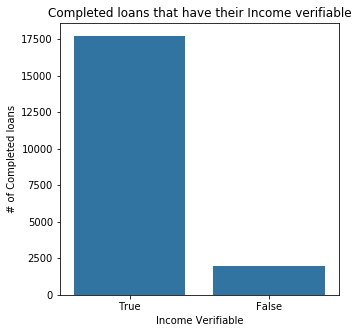

In [14]:
#First get the amount of loaners that have a verifiable income
cat_order = loans['IncomeVerifiable'].value_counts().index
plt.figure(figsize=[5, 5])
sb.countplot(data = loans, x = 'IncomeVerifiable', color = sb.color_palette()[0], order=cat_order)
plt.xlabel('Income Verifiable')
plt.ylabel('# of Completed loans')
plt.title('Completed loans that have their Income verifiable');

Here we can see that there are around 17500 completed loans with a verifiable income and around 2500 of not verifiable income.

#### What is the difference between the homeowner and not homeowners completed loans?

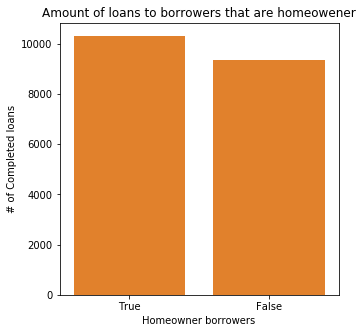

In [15]:
# Check the amount of loans to borrowers that are homeowener
plt.figure(figsize=[5, 5])
base_color = sb.color_palette()[1]
cat_order = loans['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = loans, x = 'IsBorrowerHomeowner', color = base_color, order=cat_order)
plt.xlabel('Homeowner borrowers')
plt.ylabel('# of Completed loans')
plt.title('Amount of loans to borrowers that are homeowener');

We can see a small diferrence between this two. 

#### What employment status has more completed loans?

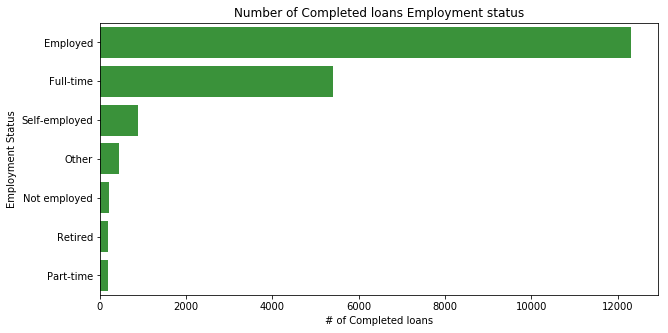

In [16]:
# let get now the employment status as a single variable. 
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[2]
sb.countplot(data = loans, y = 'EmploymentStatus', color = base_color, order=loans['EmploymentStatus'].value_counts().index)
plt.xlabel('# of Completed loans')
plt.ylabel('Employment Status')
plt.title('Number of Completed loans Employment status');

We can observe that we have more completed loans with an employeed status.

#### How many we have on the very good prosper group ?

Text(0.5,1,'Count of completed loans given a ProsperGroup value')

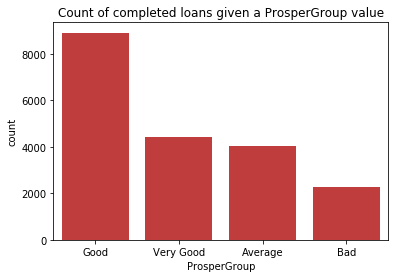

In [17]:
#we create a category with the properscore value
bin_edges= [0, 3, 5, 8, 11]
bin_edges
bin_names = ['Bad', 'Average', 'Good', 'Very Good']
bin_names
base_color = sb.color_palette()[3]
loans['ProsperGroup']=pd.cut(loans['ProsperScore'], bin_edges, labels=bin_names)
cat_order = loans['ProsperGroup'].value_counts().index
sb.countplot(data = loans, x = 'ProsperGroup', color = base_color, order=cat_order)
plt.title('Count of completed loans given a ProsperGroup value')


We can see that we have around 4000 completed loans out of 19664.

In [18]:
# NOw a category for the income range 
# bins = [0,3.200333e+03,4.666667e+03,5.608026e+03,6.825000e+03,1750003]
bins = [0/12,18871/12,47100/12,100000/12,200000/12,1750003/12]
labels = ['Poverty','Lower-Middle', 'Middle-Middle', 'Upper-Middle', 'Upper-class']
loans['Class_type'] = pd.cut(loans.StatedMonthlyIncome, bins, labels = labels)
loans.Class_type.value_counts()

Middle-Middle    9846
Lower-Middle     5936
Upper-Middle     2642
Poverty           635
Upper-class       373
Name: Class_type, dtype: int64

#### What type of class has  the highest number of completed loans?

Text(0.5,1,'Completed loans by class type')

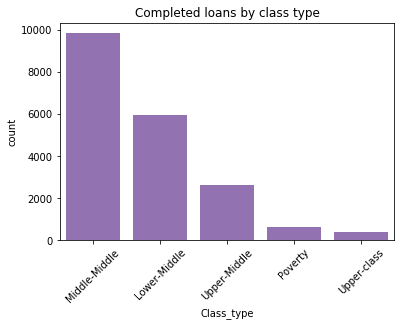

In [19]:
# Plot the borrowers count per class 
base_color = sb.color_palette()[4]
order = ['Middle-Middle','Lower-Middle','Upper-Middle','Poverty','Upper-class' ]
sb.countplot(x='Class_type', data=loans, order=order, color = base_color)
plt.xticks(rotation = 45)
plt.title('Completed loans by class type')

We can observe the middle middle Class_type is the class with the heights amount of completed loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It surprises me that there are more middle middle class borrowers that completed their loan and the upper-class is the lowest type of class with completed loans. No, I didn't transform any plot because I couldnt find no reason for it.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

This new column has the category of income classes described by investing.com. I made a new column because I wanted to know what class is the class that borrows the most. 

## Bivariate Exploration


#### What is the most common LoanOriginalAmount amount in both  IncomeVerifiable category?

Text(0.5,1,'LoanOriginalAmount vs IncomeVerifiable')

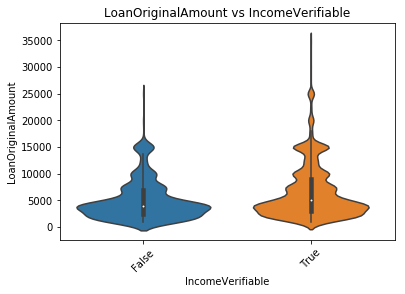

In [20]:
sb.violinplot(data=loans, x='IncomeVerifiable', y='LoanOriginalAmount');
plt.xticks(rotation = 45)
plt.title('LoanOriginalAmount vs IncomeVerifiable')


We can see a big amount of data in the 0-10000 range in both False and True IncomeVerifiable

#### What type of EmploymentStatus has the highest amount of LoanOriginalAmount of  completed loans ?

Text(0.5,1,'EmploymentStatus vs LoanOriginalAmount')

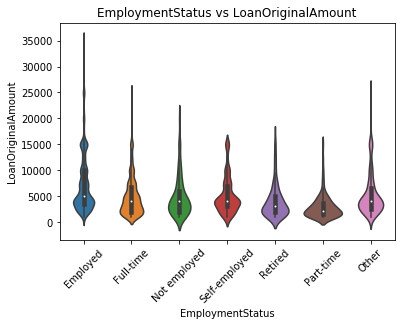

In [21]:
sb.violinplot(data=loans, x='EmploymentStatus', y='LoanOriginalAmount');
plt.xticks(rotation = 45)
plt.title('EmploymentStatus vs LoanOriginalAmount')


We have the highest amount of LoanOriginalAmount in the employeed category.

####  What is the most common value of LoanOriginalAmount   in all the propser score groups ?

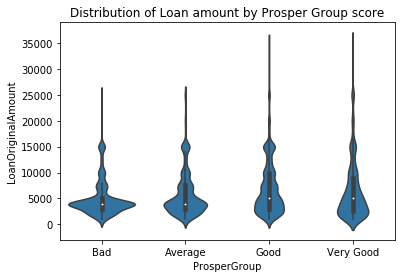

In [22]:
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = loans, x = 'ProsperGroup' , y = 'LoanOriginalAmount', bins=bins, color = base_color)
plt.title('Distribution of Loan amount by Prosper Group score')
plt.show()

The most common value in all 4 ProsperGroup categorys is 5000.

#### What is the most common amount of LoanOriginalAmount in the five Class_type categorys ?

Text(0.5,1,'Class_type vs LoanOriginalAmount')

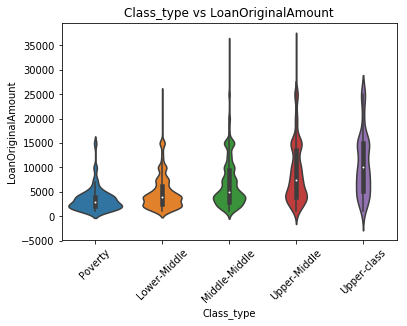

In [23]:

sb.violinplot(data=loans, x='Class_type', y='LoanOriginalAmount');
plt.xticks(rotation = 45)
plt.title('Class_type vs LoanOriginalAmount')

The most common value of LoanOriginalAmount in all five Class_type categorys is around the 2500.

#### What Class_type has the heights amount of completed loans in the employed category ?

Text(0.5,1,'EmploymentStatus vs Class_type')

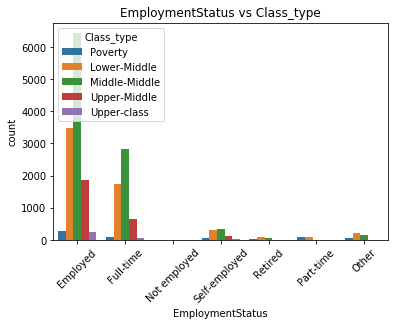

In [24]:
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'Class_type')
plt.xticks(rotation = 45)
plt.title('EmploymentStatus vs Class_type')

The employed middle middle class has the heights amount of completed loans.

#### Whats is the hightest  LoanOriginalAmount amount of completed loans for the middle middle class ?

In [25]:
#create a function for eache Class_type
def classtype(classtype):
    ctp = loans[loans['Class_type'] == classtype]
    g = sb.FacetGrid(data = ctp, size = 5)
    g.map(plt.scatter, 'EmploymentStatus', 'LoanOriginalAmount', alpha= .5)
    g.add_legend()
    plt.xticks(rotation = 45)
    plt.title('Amount of completed loans of the {} class'.format(classtype))    
    return()
    
    

()

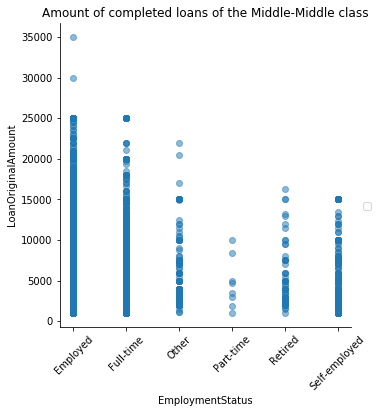

In [26]:
classtype('Middle-Middle')


35000 is the maximum amount of LoanOriginalAmount in the middle middle class.

#### Whats is the hightest  LoanOriginalAmount value of completed loans for the upper middle class given he works full time?

()

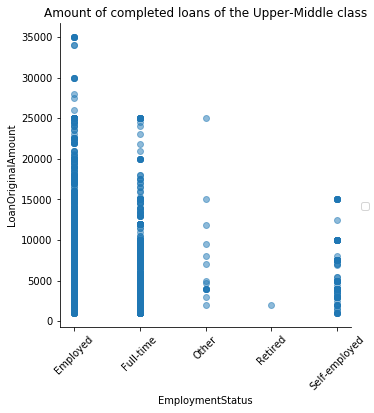

In [27]:
classtype('Upper-Middle')


The upper middle class highest value given that he works full time is 25000

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between the loan amount and our first three variables are quite different, because we saw in the univariate description that almost all borrowers were employeed and income verifiable people, while on the second with the bivariate we see that for the amount to be borrowed, both the employeed and income verifiable people are the ones that borrow bigger loans

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, with the employee status and class type. The people that borrows the most are the employeed and full time workers. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### What is the highest LoanOriginalAmount amount  of a completed loan in the not employee EmploymentStatus category?

Distribution of Debt to Income ratio by Prosper Group score:


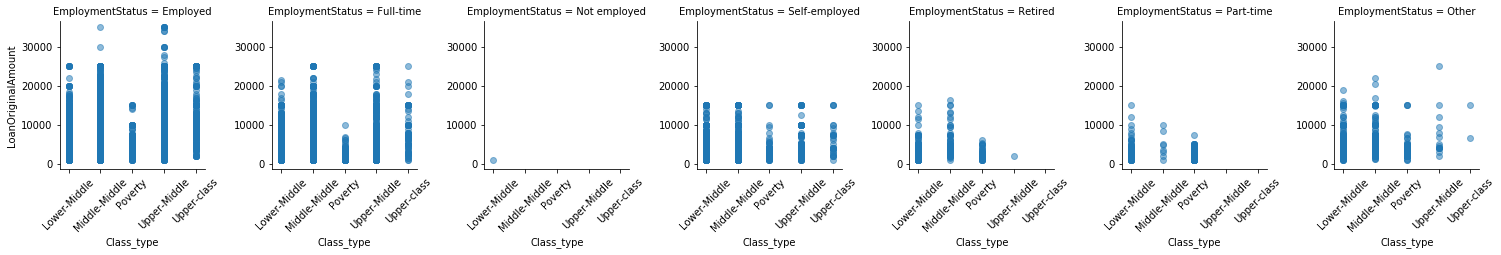

In [28]:
# Get a facegrid for the employment status 
print('Distribution of Debt to Income ratio by Prosper Group score:')
g = sb.FacetGrid(data = loans, col = 'EmploymentStatus', margin_titles = True)
g.map(plt.scatter,'Class_type','LoanOriginalAmount', alpha= .5)
g.set_xticklabels( rotation=45)
plt.show()

In [29]:
display(loans.loc[(loans['EmploymentStatus'] == 'Not employed') & 
                      (loans['Class_type'] == 'Lower-Middle')])



,ListingKey,LoanStatus,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,ProsperGroup,Class_type
21386,BC0C3466047510716AB85FC,Completed,3.0,D,8.0,6,Not employed,38.0,True,Not employed,True,2167.583333,1000,Good,Lower-Middle


We can see the highest LoanOriginalAmount amount in the Not employed status is 1000

#### Is the ownership of a house a big difference in the LoanOriginalAmount amount and the class type ?

Distribution of Debt to Income ratio by Prosper Group score:


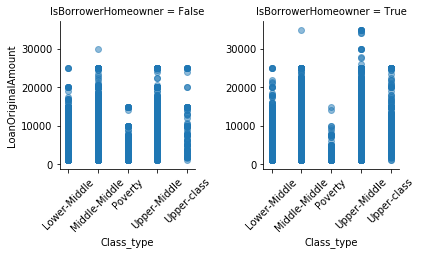

In [30]:
print('Distribution of Debt to Income ratio by Prosper Group score:')
g = sb.FacetGrid(data = loans, col = 'IsBorrowerHomeowner', margin_titles = True)
g.map(plt.scatter,'Class_type','LoanOriginalAmount', alpha= .5)
g.set_xticklabels( rotation=45)
plt.show()

We cant see a big difference in values between the home owners of a given class and the loan amount.

#### what is the maximum LoanOriginalAmount value of a completed loan in the middle middle class and does it has a house?

It is clearly visible that being a home owner is a help to get a higher loan amount. Despite the income range being
similar:


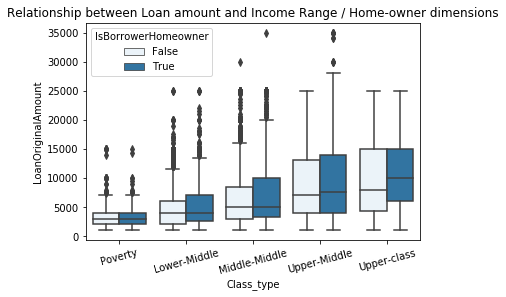

In [31]:
print('It is clearly visible that being a home owner is a help to get a higher loan amount. Despite the income range being')
print('similar:')

base_color = sb.color_palette()[0]
sb.boxplot(data = loans, x = 'Class_type', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner' ,color = base_color)
plt.title('Relationship between Loan amount and Income Range / Home-owner dimensions')
plt.xticks(rotation = 15);

The maximum LoanOriginalAmount value is 35000 and it does have a house.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We can see that most of the completed loans are with borrowers that are employeed and getting an income of a middle middle class.

### Were there any interesting or surprising interactions between features?

That a borrower with a home does not make a big difference. We almost have as much completed loans as the not homeowners group.

## Conclusions

The most completed loans are with employeed borrowers.

The most completed loans are with the middle middle class

Reitred people have the smallest amount of completed loans.

The upper class is the class with less completed loans 

